# 3

In [2]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [3]:
# authentication
consumerKey = 'nAfAiljzt8Ntd1oatjYU2uvKc'
consumerSecret = 'JBJahC7nKS4q853V0vodZ8buaYGHwySv6u5XFm52dlownOqTRm'
accessToken = '4880646753-8TzBk1UEjuvXEXR2XL7uJ2ZFMRZnwNrDOioUHI9'
accessTokenSecret = 'CjAas3cB7A9OW7SJFA6SOkyfgv61MyN59W0g47ZSqBL2b'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)
client = tweepy.Client(bearer_token=r'AAAAAAAAAAAAAAAAAAAAAGiQiQEAAAAAAePfFiX27jZnFuNv7yiNEm4Ol24%3DuaMkpfuchBoWnJ7zrMmMsqsqpFXcPZXrgy6BGbUYQGyG9EZ(y0sa)T')

In [3]:
# input for term to be searched and how many tweets to search

searchTerm=input("select the query term ")
NoofTweets=int(input("select the no of tweets "))
query = searchTerm+" -is:retweet"
tweets=client.search_recent_tweets(query=query, max_results=NofTweets)

select the query termRussia war
select the no of tweets50


In [4]:
tweet_list = [tweet.text for tweet in tweets.data]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,"@SecBlinken @MohamedBinZayed APPEAL TO RUSSIA,..."
1,"All oligarch homes in the UK, EU, should house..."
2,"@Tendar To be fair, the West has not sent any ..."
3,"""Russia and Myanmar form a partnership of uneq..."
4,@giovannibasta @business No one takes war esti...
...,...
95,"@EmmaKennedy @PeterMcCole Well to be fair, the..."
96,@business #RUSSIA will use a dirty bomb any ti...
97,@Veritatem2021 @WeRone777 @JackJsherebkin @ozz...
98,@GlobalHaraKiri @Jordan_Duffy23 @tarkov they a...


# 4

In [5]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [6]:
tweet_df.head()

,0,cleaned_data
0,"@SecBlinken @MohamedBinZayed APPEAL TO RUSSIA,...",APPEAL TO RUSSIA UKRAINE and WORLD Russians be...
1,"All oligarch homes in the UK, EU, should house...",All oligarch homes in the UK EU should house U...
2,"@Tendar To be fair, the West has not sent any ...",To be fair the West has not sent any A stuff t...
3,"""Russia and Myanmar form a partnership of uneq...",Russia and Myanmar form a partnership of unequ...
4,@giovannibasta @business No one takes war esti...,No one takes war estimates as factual especial...


In [7]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [8]:
tweet_df.head()

,0,cleaned_data
0,"@SecBlinken @MohamedBinZayed APPEAL TO RUSSIA,...",APPEAL TO RUSSIA UKRAINE and WORLD Russians be...
1,"All oligarch homes in the UK, EU, should house...",All oligarch homes in the UK EU should house U...
2,"@Tendar To be fair, the West has not sent any ...",To be fair the West has not sent any A stuff t...
3,"""Russia and Myanmar form a partnership of uneq...",Russia and Myanmar form a partnership of unequ...
4,@giovannibasta @business No one takes war esti...,No one takes war estimates as factual especial...


In [9]:
# changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)
tweet_df.head()

,0,cleaned_data
0,"@SecBlinken @MohamedBinZayed APPEAL TO RUSSIA,...",appeal to russia ukraine and world russians be...
1,"All oligarch homes in the UK, EU, should house...",all oligarch homes in the uk eu should house u...
2,"@Tendar To be fair, the West has not sent any ...",to be fair the west has not sent any a stuff t...
3,"""Russia and Myanmar form a partnership of uneq...",russia and myanmar form a partnership of unequ...
4,@giovannibasta @business No one takes war esti...,no one takes war estimates as factual especial...


In [10]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\farook\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)
tweet_df['cleaned_data'].values

array(['appeal to russia ukraine and world russian believe in jesus ukranian and most european and american also many others too by concidence or not today we talked about the war after we met a guy on the plane and were reading a book about jesus',
       'all oligarch home in the uk eu should house ukrainian guest and asset sold to finance them until they return back to their own land slavaukra ni don t be fooled sanction really are hurting russia s war against ukraine carla norrl f',
       'to be fair the west ha not sent any a stuff to ukraine rather the west found out it nd generation war machine are more advanced that russia s th generation equivalent',
       'russia and myanmar form a partnership of unequals by by sui lee wee via nyt',
       'no one take war estimate a factual especially aircraft loss these are notoriously difficult to calculate also especially pre war it wa only russia that we in the west listened too for month we debated nazi and nato and all the time russi

In [12]:
tweet_df['cleaned_data'].values

array(['appeal to russia ukraine and world russian believe in jesus ukranian and most european and american also many others too by concidence or not today we talked about the war after we met a guy on the plane and were reading a book about jesus',
       'all oligarch home in the uk eu should house ukrainian guest and asset sold to finance them until they return back to their own land slavaukra ni don t be fooled sanction really are hurting russia s war against ukraine carla norrl f',
       'to be fair the west ha not sent any a stuff to ukraine rather the west found out it nd generation war machine are more advanced that russia s th generation equivalent',
       'russia and myanmar form a partnership of unequals by by sui lee wee via nyt',
       'no one take war estimate a factual especially aircraft loss these are notoriously difficult to calculate also especially pre war it wa only russia that we in the west listened too for month we debated nazi and nato and all the time russi

In [13]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [14]:
tweet_df['cleaned_data'].values

array(['appeal russia ukraine world russian believe jesus ukranian european american also many others concidence today talked war met guy plane reading book jesus',
       'oligarch home uk eu house ukrainian guest asset sold finance return back land slavaukra ni fooled sanction really hurting russia war ukraine carla norrl f',
       'fair west ha sent stuff ukraine rather west found nd generation war machine advanced russia th generation equivalent',
       'russia myanmar form partnership unequals sui lee wee via nyt',
       'one take war estimate factual especially aircraft loss notoriously difficult calculate also especially pre war wa russia west listened month debated nazi nato time russia wa lying',
       'fighting rage ukraine bakhmut battle kherson loom russia ukraine war news ukrainian troop holding attack russian force two eastern town southern front poised battle strateg',
       'exclusive video putin desperate failing russiaislosing stoprussianow ukrainewillwin ukraine

# 5

In [15]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [16]:
tweet_df['polarity'].value_counts()

Weakly Negative      31
Weakly Positive      30
Neutral              23
Positive              7
Negative              6
Strongly Negative     1
Strongly Positive     1
Name: polarity, dtype: int64

In [17]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [18]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,70):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1


In [21]:
# finding average reaction
NoOfTerms=NoofTweets
polarity = polarity / NoOfTerms
polarity

-0.03819000721500721

In [22]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [23]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)



In [24]:
 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on Russia war by analyzing 50 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Negative

------------------------------------------------------------------------------------------

Detailed Report: 
8.00% people thought it was positive
36.00% people thought it was weakly positive
0.00% people thought it was strongly positive
12.00% people thought it was negative
50.00% people thought it was weakly negative
2.00% people thought it was strongly negative
30.00% people thought it was neutral


In [25]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

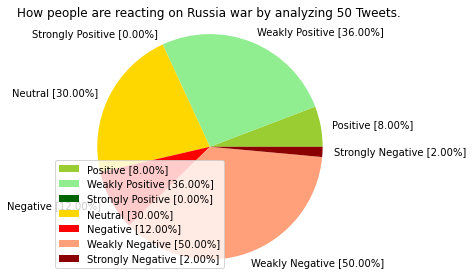

In [28]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()